In [1]:
import sklearn.datasets as skd
categories = ['alt.crime','sci.med','comp.graphics']
news_train = skd.load_files('/Users/hp/Downloads/20_newsgroups/train',categories = categories, encoding = 'ISO-8859-1')
news_test = skd.load_files('/Users/hp/Downloads/20_newsgroups/test',categories = categories, encoding = 'ISO-8859-1')

In [2]:
news_train

{'data': ["Path: cantaloupe.srv.cs.cmu.edu!das-news.harvard.edu!noc.near.net!howland.reston.ans.net!news.cac.psu.edu!psuvm!sec108\nOrganization: Penn State University\nDate: Thu, 15 Apr 1993 20:53:12 EDT\nFrom: <SEC108@psuvm.psu.edu>\nMessage-ID: <93105.205312SEC108@psuvm.psu.edu>\nNewsgroups: alt.atheism\nSubject: Why the bible?\nLines: 38\n\n      One thing I think is interesting about alt.athiesm is the fact that\nwithout bible-thumpers and their ilk this would be a much duller newsgroup.\nIt almost needs the deluded masses to write silly things for athiests to\ntear apart. Oh well, that little tidbit aside here is what I really wanted\nwrite about.\n\n      How can anyone believe in such a sorry document as the bible? If you\nwant to be religious aren't there more plausable books out there? Seriously,\nthe bible was written by multiple authors who repeatedly contradict each\nother. One minute it tells you to kill your kid if he talks back and the next\nit says not to kill at all. I

In [3]:
news_train.target_names

['alt.crime', 'comp.graphics', 'sci.med']

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
text = ['The more we practice the more we excel','it is good to chase it if it is your dream','the battle of life is a mode of life']
vector = CountVectorizer()
vector.fit(text)
print("vocabulary :"+str(vector.vocabulary_) + '\n\n')


vocabulary :{'the': 13, 'more': 10, 'we': 15, 'practice': 12, 'excel': 3, 'it': 7, 'is': 6, 'good': 4, 'to': 14, 'chase': 1, 'if': 5, 'your': 16, 'dream': 2, 'battle': 0, 'of': 11, 'life': 8, 'mode': 9}




In [5]:
vector.get_feature_names()
print("feature_names"+str(vector.get_feature_names())+'\n\n')
counts = vector.transform(text)
print("printing counts"+'\n'+str(counts.toarray()))

feature_names['battle', 'chase', 'dream', 'excel', 'good', 'if', 'is', 'it', 'life', 'mode', 'more', 'of', 'practice', 'the', 'to', 'we', 'your']


printing counts
[[0 0 0 1 0 0 0 0 0 0 2 0 1 2 0 2 0]
 [0 1 1 0 1 1 2 3 0 0 0 0 0 0 1 0 1]
 [1 0 0 0 0 0 1 0 2 1 0 2 0 1 0 0 0]]


In [6]:
from sklearn.feature_extraction.text import TfidfTransformer
vectorizer = TfidfTransformer()
vectorizer.fit(counts)
print('Learning frequency of all'+str(vectorizer.idf_)+'\n\n')
freq = vectorizer.transform(counts)
print('Transforming the frequencies on learning weight:\n\n'+str(freq.toarray()))


Learning frequency of all[1.69314718 1.69314718 1.69314718 1.69314718 1.69314718 1.69314718
 1.28768207 1.69314718 1.69314718 1.69314718 1.69314718 1.69314718
 1.69314718 1.28768207 1.69314718 1.69314718 1.69314718]


Transforming the frequencies on learning weight:

[[0.         0.         0.         0.2849755  0.         0.
  0.         0.         0.         0.         0.56995099 0.
  0.2849755  0.43346242 0.         0.56995099 0.        ]
 [0.         0.24032909 0.24032909 0.         0.24032909 0.24032909
  0.36555293 0.72098726 0.         0.         0.         0.
  0.         0.         0.24032909 0.         0.24032909]
 [0.29938511 0.         0.         0.         0.         0.
  0.22769009 0.         0.59877022 0.29938511 0.         0.59877022
  0.         0.22769009 0.         0.         0.        ]]


In [7]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
x_train_tf = count_vect.fit_transform(news_train.data)
x_train_tf.shape

(3000, 48291)

In [8]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
x_train_tfidf = tfidf_transformer.fit_transform(x_train_tf)
x_train_tfidf.shape

(3000, 48291)

In [9]:
from sklearn.naive_bayes import MultinomialNB
clf =  MultinomialNB().fit(x_train_tfidf,news_train.target)

In [10]:
docs_new = ['a black t-shirt with white print in Tamil, uploaded by Farook Hameed as his profile picture on Facebook on November 6, 2015 written a famous poem on his timeline saying god is within a human.Barely a year-and-a-half later,Not by 31-year-old Farook, but by six childhood friends consumed by an hatred for his friend, the police are still trying to fathom.Hameed was stabbed 18 times on March 16 at Ukkadam, Coimbatore. His crime was that he was a rationalist and an atheist',
            'As progress in computing slows, new forms of computing graphics are coming to the forefront. At Penn State, a team of engineers is attempting to pioneer a type of computing graphics that mimics the efficiency of the systems while imporving the GPU performance.',
           'science has found its way from a very long time. but nowadays, things are taking a new turn. it is evolving with its own intelligence.']
x_new_counts = count_vect.transform(docs_new)
x_new_tfidf = tfidf_transformer.transform(x_new_counts)
predicted = clf.predict(x_new_tfidf)



In [11]:
for x in predicted:
    print(x)

0
1
2


In [12]:
news_train.target_names


['alt.crime', 'comp.graphics', 'sci.med']

In [13]:
x_test_tf = count_vect.transform(news_test.data)
x_test_tfidf = tfidf_transformer.transform(x_test_tf)
predicted =  clf.predict(x_test_tfidf)

In [20]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
print("accuracy",accuracy_score(news_test.target,predicted))
print(metrics.classification_report(news_test.target, predicted,target_names= news_test.target_names)), 
metrics.confusion_matrix(news_test.target,predicted)



accuracy 0.994
               precision    recall  f1-score   support

    alt.crime       0.99      1.00      1.00      1000
comp.graphics       0.99      0.99      0.99      1000
      sci.med       1.00      0.99      0.99      1000

     accuracy                           0.99      3000
    macro avg       0.99      0.99      0.99      3000
 weighted avg       0.99      0.99      0.99      3000



array([[1000,    0,    0],
       [   6,  991,    3],
       [   0,    9,  991]], dtype=int64)

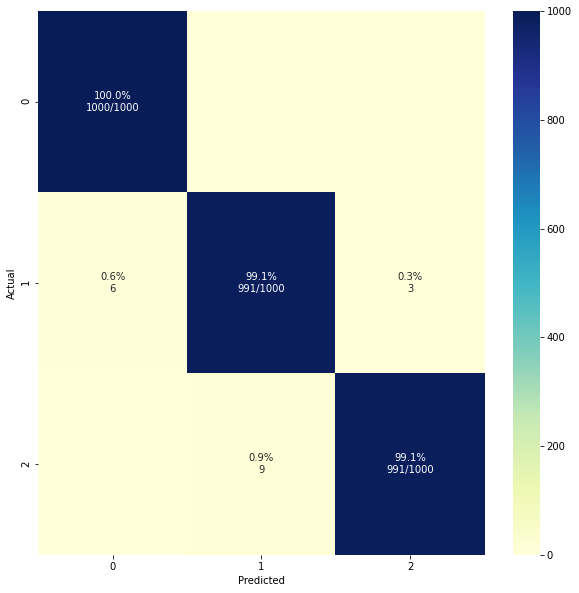

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_cm(y_true, y_pred, figsize=(10,10)):
   
    cm = confusion_matrix(news_train.target,predicted,labels=np.unique(news_train.target))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(news_train.target), columns=np.unique(news_train.target))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, cmap= "YlGnBu", annot=annot, fmt='', ax=ax)
    
plot_cm(news_train.target,predicted)


In [19]:
from sklearn import metrics
cm = metrics.confusion_matrix(news_test.target,predicted)

In [21]:
import pandas as pd
df = pd.DataFrame(cm)
print(df)

      0    1    2
0  1000    0    0
1     6  991    3
2     0    9  991


In [18]:
df.to_csv('model.csv',header =['Murder','Chain Snatching','Rape'], index= False)